* * *
<pre> NYU Paris            <i> Artificial intelligence - Fall 2023 </i></pre>
* * *


<h1 align="center"> Lab 3: Probability and Linear algebra  </h1>

<pre align="left"> September 14th 2023               <i> Author: Hicham Janati </i></pre>
* * *


##### Goals:
- Random numbers generation with numpy
- Get familiar with the law of large numbers and the central limit theorem
- Linear algebra: scalar products, eigenvalue decomposition and SVD


# Part 1: Probability
###  a) Random number generators
Mathematically, a random variable is a function that takes an 'event' $\omega$ to some measurable space $\mathcal{X}$. Exampls:
1. The result of a throw of a dice $X$ can be represented as a random variable taking values in $\mathcal{X} = \{1, 2, 3, 4, 5, 6\}$ where each event $\omega$ is a throw which is mapped to some observed number. 
2. The height of a person $H$ can be represented as a random variable taking values in $\mathcal{X} = \mathbb{R}_+$ where each event $\omega$ is the act of picking a person randomly and measuring their height.

For the sake of simplicity, we omit $\omega$ in general. 

Assume we perform $n$ consecutive and independent dice throws. We denote the i-th throw by a random variable $X_i$. All $X_1, \dots, X_n$. 

#### Question 1
Look up the documentation of the function `numpy.random.randint` and generate 10 samples. 

In [1]:
import numpy as np
    #np.random.seed(42)
np.random.randint(10, size=10)

array([1, 6, 7, 3, 7, 0, 7, 4, 9, 6])

#### Question 2
Run the same cell a second time. What do you notice ? Re-run the entire notebook `Kernel -> Restart`. Do you get the same first throw ? 

In [2]:
#It changes every time you rerun the cell and when you restart the entire notebook.


#### Question 3
Add the following instruction before your code above and run the cell multiple times. What do you notice ?


In [3]:
np.random.seed(42) #The array stays the same when you add this

Even though the behavior of random generators *seems* random, it is not. A computer program is by definition deterministic. Random generators are actually pseudo-random: they only simulate the behavior of random numbers for a small enough sample size. PRGs produce a long sequence of repeting numbers, but they only repeat themselves after a very long time. The starting point of this sequence is called the seed.

#### Question 4
Run the following cell. What is `rng` ? How can it be used ?

_Hint: Type `rng.` and hit `tab` to get python suggestions._

In [4]:
rng = np.random.RandomState(43)
rng.randint(1,7, size=10)

#Why we fix the seed:


array([5, 1, 2, 6, 3, 1, 4, 2, 4, 4])

#### Question 5
Replace the seed number with `None`. What happened ?

#### Quetion 5
Complete the following function that takes an input $n$ and returns $n$ samples from a dice throw.  



In [5]:
def dice_throws(n, seed=None):
    a=rng.randint(n, size=n)
    return a

n = 5
dice = dice_throws(n)
print(f"{n} dice throws: {dice}")

5 dice throws: [2 0 3 2 3]


In [6]:
def dice_throws(n, random_state=None):
#we want fixed seed defined outside of this code block. How do we do this?
#user experience features 
    if random_state is None:
        rng=np.random.RandomState(None)
    elif type(random_state)==int:
        rng=np.random.RandomState(random_state)
    else:
        rng=random_state

    a=rng.randint(n, size=n)
    return a

#arguments of functions do not have a fixed type

#### Question 6
Run the following cell to display the histogram of the dice throws for small and large n.

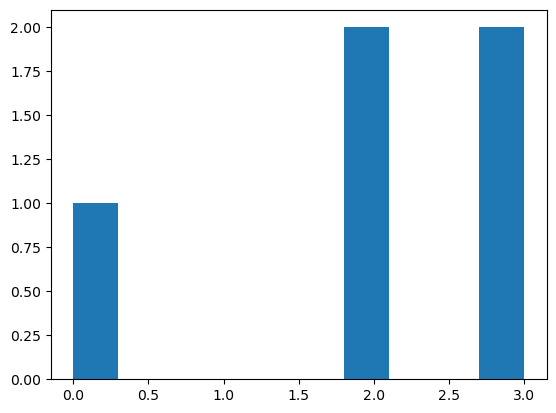

In [7]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dice)
plt.show()

#### Question 7
Complete the following function that computes the mean of the samples and make a list `means` containing the mean throw for the different values of n in `n_values`. As $n$ increases, does the mean converge to the expected theoretical mean ?

In [8]:
def mean_throw(n, seed=None):
    n=rng.randint(n_values, size=n)
    for i in n:
        sum=print(sum(i)/n)
    return sum

n_values = [5, 10, 20, 50, 100, 200, 500, 1000, 5000]
means = []

# todo


This result is known as the law of large numbers. To study it formally, we are going to turn to a simple example: the coin flip.
### b) Law of large numbers
Let $X$ be a random variable with mean $\mu$ and variance $\sigma^2$.

The law of large numbers states that the empirical mean $\bar{X_n} = \frac{1}{n}\sum_{i=1}^n X_i$ converges to the true mean $\mu$ as $n\to+\infty$.



We are going to test this result empirically. 
In the rest of this section, $X$ is a Bernoulli random variable (fair coin flip).

In [16]:
import numpy as np
import matplotlib.pyplot as plt

#### Question 8
What is the mean of $X$ ?

In [14]:
cov=np.array([[1,1],[1,2]])
mean=np.array([0,0])
np.random.multivariate_normal(mean, cov=cov, size=2000)

array([[-0.34984045, -0.72859317],
       [-1.35166096, -0.3966044 ],
       [ 0.32227584,  0.24620876],
       ...,
       [ 1.74170353,  2.8515894 ],
       [ 1.93588283,  2.75579156],
       [-1.58754477, -2.14473438]])

In [15]:
plt.figure()
plt.scatter(X.T[0], X.T[1], s=5)
plt.grid()
plt.show()

NameError: name 'X' is not defined

<Figure size 640x480 with 0 Axes>

#### Question 9
Generate an sample of size 100 and compute its mean.

In [10]:
x=rng.randint(low=0, high=2, size=100)
x.mean()

0.5

#### Question 10
Complete the following code to test the LLN theorem. We want to plot the errors: 
$$ error_n = |\bar{X_n} - limit| $$
and visualize their convergence to zero.

In [11]:
np.arange(10,1000,100)

array([ 10, 110, 210, 310, 410, 510, 610, 710, 810, 910])

In [12]:
# expected limit
lln_limit = # to do

ns = np.arange(10, 10000, 100)

# compute means here
means = []

errors = # to do 

SyntaxError: invalid syntax (2719863551.py, line 2)

In [ ]:
plt.figure()
plt.plot(ns, errors)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"Errors $E_n$")
plt.xlabel(r"$n$")
plt.show()

### c) Central limit theorem
#### Question 11
As increases these errors (with the sign) should follow a Gaussian distribution. This is known as the central limit theorem. Formally:

The central limit theorem provides a rate of convergence as well as the distribution of the errors of the empirical mean as $n \to +\infty$:

$$\frac{\sqrt{n}}{\sigma} (\bar{X_n} - \mu) \sim \text{Gaussian}(0, 1)$$

With a provided and fixed N, write a function that computes M samples of the error $E_n = \frac{\sqrt{n}}{\sigma} (\bar{X_n} - \mu)$

In [ ]:
n=100
mu=0
sigma= (mu *(1-mu))**0.5
X=rng.randint(0,2,size=(n,5))
means=X.mean(axis=0)
errors=n**0.5/sigma*(means-mu)

In [ ]:
def generate_errors(n, M, seed=None):
    error=n.sqrt()/sigma * (M)
    return error

In [ ]:
E = generate_errors(1000, 100)
E

#### Question 12
Complete the following cell to plot a histogram of the errors and the true density.

$$ \frac{1}{\sqrt{2\pi}}\exp(-\frac{x^2}{2}) $$

In [ ]:
n = 10000
M = 1000
E = generate_errors(n, M)

x = np.linspace(-6, 6, 100)
density = 1/(2*np.pi)**0.5*np. 

plt.figure()
plt.plot(x, density, color="cornflowerblue", lw=2, label="Gaussian density function")
plt.hist(E, bins=100, alpha=0.6, color="gold", label="Errors histogram", density=True)
plt.legend()
plt.show()

# Part 2: Linear algebra
The scalar product between two vectors of the form $x = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}$ provides a score of ``congruence`` i.e whether vectors are aligned, orthogonal or anti-aligned. The amplitude of the score is proportional to their magnitudes:

$$\langle x, y \rangle = x_1y_1 + x_2 y_2 = \|x\|\|y\| \cos(\alpha) $$ where $\alpha$ is the angle formed by $x$ and $y$.  

#### Question 1


Let $w$ be a fixed vector in $\mathbb{R}^2$. What is the set of points $x$ in the space such that $\langle w, x\rangle = 0$ ? 

#### Question 2
Complete the following figure with the set of points $x$.

In [ ]:
from matplotlib import pyplot as plt
options = {"head_width":0.1, "head_length":0.2, "length_includes_head":True}

plt.figure()
plt.arrow(0,0,1,2,fc='b',ec='b',**options)
plt.grid()
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

#### Question 3
What about the set of points such that $\langle w, x\rangle > 0$ and $\langle w, x\rangle < 0$ ?

#### Question 4 
Generalize the previous result for a function of the type $\langle w, x\rangle + b$ where b is some non-zero number.

### Matrix vector operations


Let A be a matrix of the form $\begin{pmatrix} a & b \\ c & d \end{pmatrix}$.

A is the matrix representation of the linear function from $\mathbb{R}^2 \to \mathbb{R}^2$ that maps $x = \begin{pmatrix} x_1 \\ x_2\end{pmatrix} \mapsto \begin{pmatrix} a x_1 + b x_2 \\ c x_1 + d x_2 \end{pmatrix} $

#### row interpretation
Which is usually computed mentally as dot products between rows of A and the column x: 

$$A x = \begin{pmatrix} \langle A_{1.}, x \rangle \\ \langle A_{2.}, x \rangle \end{pmatrix} $$

#### column interpretation

$Ax$ can also be seen as:

$$A x =  x_1 \begin{pmatrix} a \\ c \end{pmatrix} +  x_2 \begin{pmatrix} b \\ d\end{pmatrix} = x_1 A_{.1} + x_2 A_{.2}$$
Therefore, applying A to $x$ is equivalent to **linearly combining its columns by the coordinates of $x$**

#### Question 5

Can you come up with a matrix that performs a projection onto the x-axis ? the y-axis ?  Test it out on some vectors and visualize them.

#### Question 6
Look up `rotation matrix` and implement a function that performs a 30 degrees rotation on the plane. Compute its determinant using `np.linalg`. Compute the scalar product between its columns, and the magnitude of its columns. What do you conclude ?

#### Question 7
A basis in a space is formed by a set of vectors that are orthogonal and have magnitude 1. A matrix formed by orthonormal vectors is called an orthogonal matrix. The spectral theorem says that for every symmetric matrix $A$, there exists an orthogonal matrix P and a diagonal matrix S such that:
$$ A = PSP^\top$$

S contains the eigenvalues of A. The columns of P are the eigenvectors of A associated to S. 

For each $i$, it holds: $$ A P_{.i} = S_i P_{i.} $$

Do eigenvalues always exist ? If not, provide a simple and general counter-example.

#### Question 8
Consider the following gaussian data.


In [17]:
cov = np.array([[1, 1], [1, 2]])
mean = np.array([0, 0])
X = np.random.multivariate_normal(mean, cov=cov, size=2000)

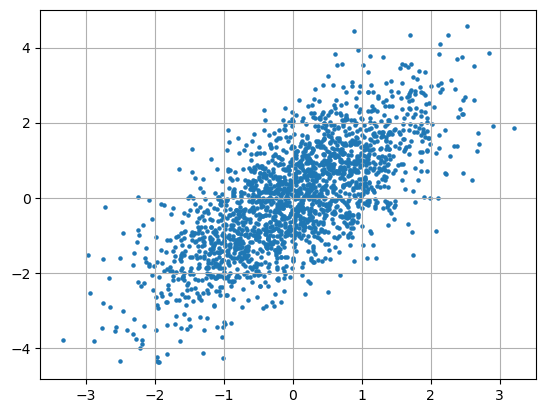

In [18]:
plt.figure()
plt.scatter(X.T[0], X.T[1], s=5)
plt.grid()
plt.show()

Compute the empirical covariance matrix $\frac{1}{n}X^\top X$. What do you notice ?

In [20]:
empirical_cov=X.T.dot(X)/200

#### Question 9
Perform the eigenvalue decomposition of the empirical covariance matrix. And visualize the eigenvectors using arrows. 

In [21]:
x.T.dot(x)/2000

0.025

#### Question 10
Using scikit-learn's PCA implementation, compare those eigenvectors with the PCA components attribute. Do they match ?